In [91]:
#pip install xgboost

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'E:\\ANACONDA\\Lib\\site-packages\\catboost\\_catboost.pyd'
Consider using the `--user` option or check the permissions.



In [88]:
#!pip install catboost

In [89]:
#pip install lightgbm

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score,KFold, GridSearchCV
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,ElasticNet, Lasso
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import lightgbm as ltb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import pickle
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

In [7]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [8]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [11]:
test.shape

(233599, 11)

In [12]:
train.shape

(550068, 12)

In [13]:
# concating train and test data

data = pd.concat([train,test], axis= 0)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
# checking the data type of the variables

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [15]:
# checking the null values

data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [16]:
# treating the null values in variable *Product_Category_2* , *Product_Category_3*

data['Product_Category_2'] = data['Product_Category_2'].fillna(0)
data['Product_Category_3'] = data['Product_Category_3'].fillna(0)

In [17]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [18]:
# dropping unnecessary variables

#data.drop(['User_ID','Product_ID'], axis = 1, inplace = True)

map_userid = data['User_ID'].value_counts()/len(data['User_ID'])
data['User_ID'] = data['User_ID'].map(map_userid)

In [19]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000060,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370.0
1,0.000060,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0.000060,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422.0
3,0.000060,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057.0
4,0.000137,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969.0


In [20]:
map_userid = data['Product_ID'].value_counts()/len(data['Product_ID'])
data['Product_ID'] = data['Product_ID'].map(map_userid)

In [21]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000060,0.000439,F,0-17,10,A,2,0,3,0.0,0.0,8370.0
1,0.000060,0.001078,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0.000060,0.000191,F,0-17,10,A,2,0,12,0.0,0.0,1422.0
3,0.000060,0.000633,F,0-17,10,A,2,0,12,14.0,0.0,1057.0
4,0.000137,0.000361,M,55+,16,C,4+,0,8,0.0,0.0,7969.0


In [22]:
# UNIVARIATE ANALYSIS

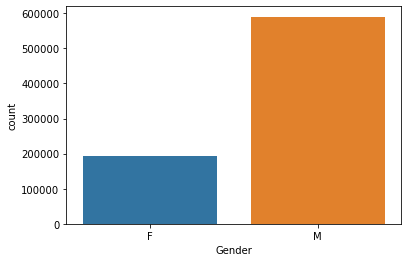

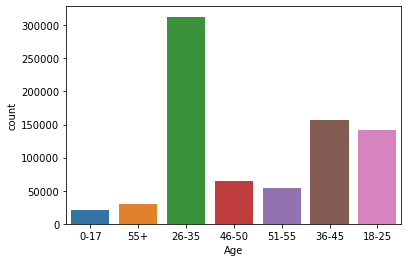

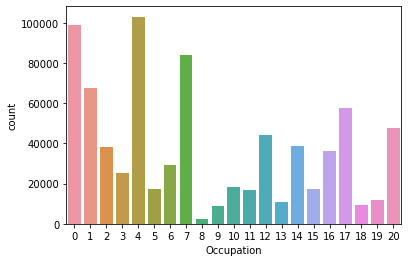

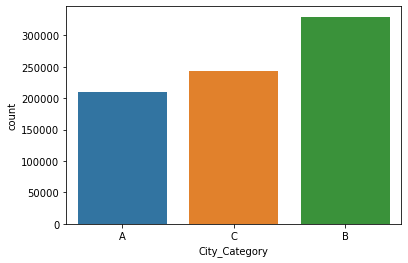

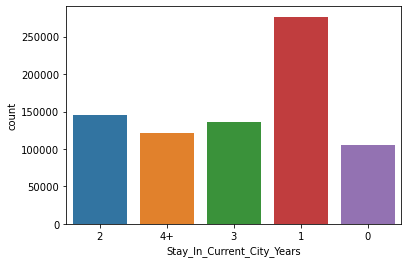

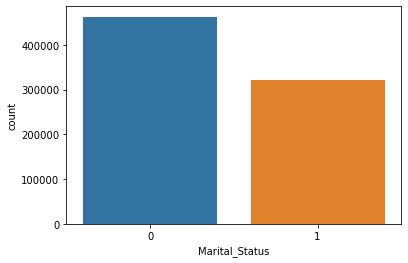

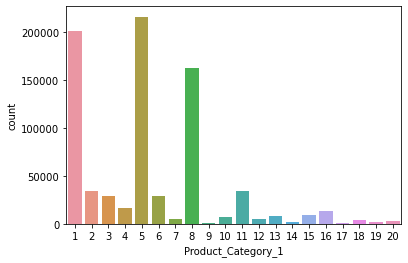

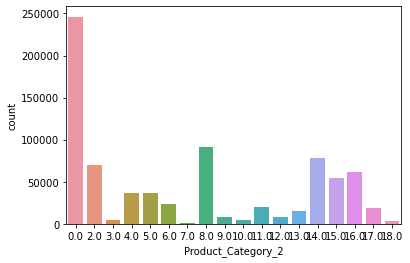

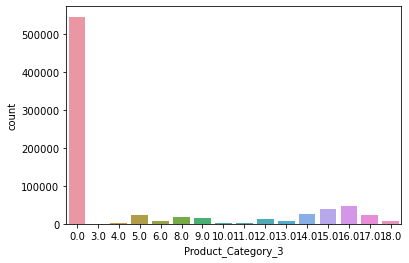

In [23]:
for i in data.loc[:,['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3',]]:
    #if i != 'Purchase' and 'User_ID' and 'Product_ID':
        sns.countplot(data[i])
        plt.show()

In [24]:
# BIVARIATE ANALYSIS

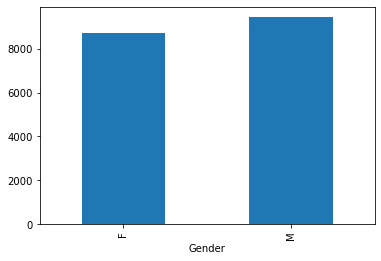

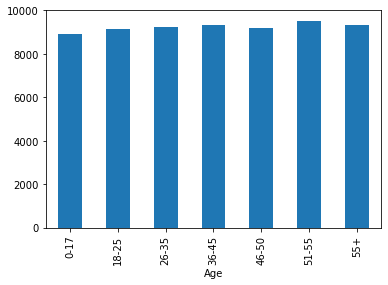

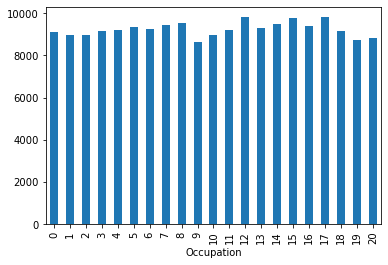

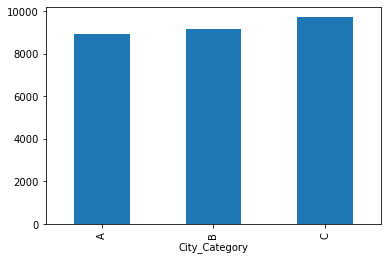

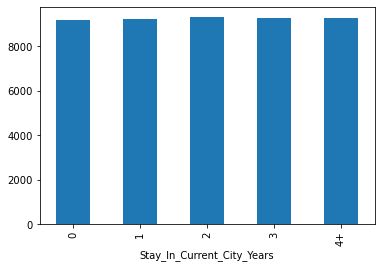

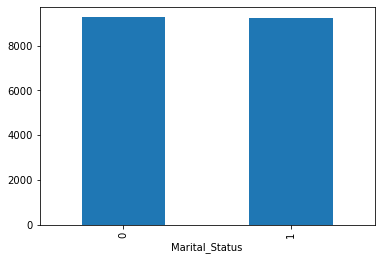

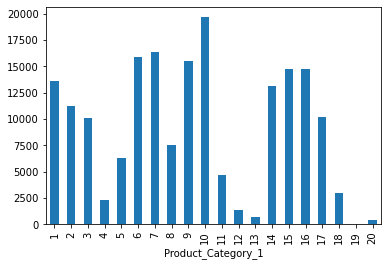

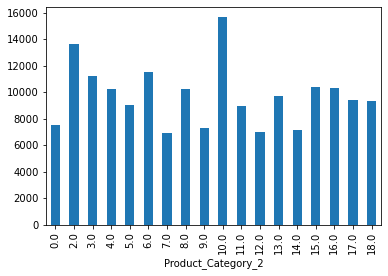

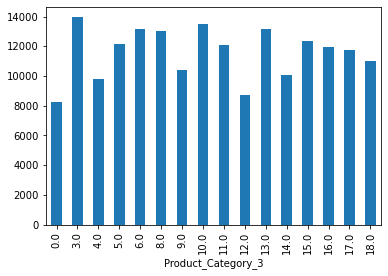

In [25]:
for i in data.loc[:,['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3',]]:
    #if i != 'Purchase':
        data.groupby(by = [i])['Purchase'].mean().plot(kind = 'bar')
        plt.show()
                     

In [26]:
# TREATING CATEGORICAL COLUMNS

In [27]:
data['Gender'] = pd.get_dummies(data['Gender'], drop_first= True)

In [28]:
lbl = LabelEncoder()

In [29]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000060,0.000439,0,0-17,10,A,2,0,3,0.0,0.0,8370.0
1,0.000060,0.001078,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0.000060,0.000191,0,0-17,10,A,2,0,12,0.0,0.0,1422.0
3,0.000060,0.000633,0,0-17,10,A,2,0,12,14.0,0.0,1057.0
4,0.000137,0.000361,1,55+,16,C,4+,0,8,0.0,0.0,7969.0


In [30]:
data['Age'] = lbl.fit_transform(data['Age'])

In [31]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000060,0.000439,0,0,10,A,2,0,3,0.0,0.0,8370.0
1,0.000060,0.001078,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,0.000060,0.000191,0,0,10,A,2,0,12,0.0,0.0,1422.0
3,0.000060,0.000633,0,0,10,A,2,0,12,14.0,0.0,1057.0
4,0.000137,0.000361,1,6,16,C,4+,0,8,0.0,0.0,7969.0


In [32]:
data['Stay_In_Current_City_Years'] = lbl.fit_transform(data['Stay_In_Current_City_Years'])

In [33]:
data = pd.get_dummies(data, drop_first = True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  float64
 1   Product_ID                  783667 non-null  float64
 2   Gender                      783667 non-null  uint8  
 3   Age                         783667 non-null  int32  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  City_Category_B             783667 non-null  uint8  
 12  City_Category_C             783667 non-null  uint8  
dtypes: float64(5),

In [35]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,0.000060,0.000439,0,0,10,2,0,3,0.0,0.0,8370.0,0,0
1,0.000060,0.001078,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0.000060,0.000191,0,0,10,2,0,12,0.0,0.0,1422.0,0,0
3,0.000060,0.000633,0,0,10,2,0,12,14.0,0.0,1057.0,0,0
4,0.000137,0.000361,1,6,16,4,0,8,0.0,0.0,7969.0,0,1


In [36]:
# separating train and test columns

In [37]:
train_f = data[~(data['Purchase'].isnull())]
test_f = data[data['Purchase'].isnull()]

In [38]:
train_f.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,0.000060,0.000439,0,0,10,2,0,3,0.0,0.0,8370.0,0,0
1,0.000060,0.001078,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0.000060,0.000191,0,0,10,2,0,12,0.0,0.0,1422.0,0,0
3,0.000060,0.000633,0,0,10,2,0,12,14.0,0.0,1057.0,0,0
4,0.000137,0.000361,1,6,16,4,0,8,0.0,0.0,7969.0,0,1


In [39]:
test_f.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,0.000019,0.001701,1,4,7,2,1,1,11.0,0.0,NaN,1,0
1,0.000108,0.000473,1,2,17,0,0,3,5.0,0.0,NaN,0,1
2,0.000413,0.000277,0,3,1,4,1,5,14.0,0.0,NaN,1,0
3,0.000413,0.000029,0,3,1,4,1,4,9.0,0.0,NaN,1,0
4,0.000140,0.000997,0,2,1,1,0,4,5.0,12.0,NaN,0,1


In [40]:
test_f.drop('Purchase', axis = 1, inplace = True)  # dropping the target variable from the test data

E:\ANACONDA\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
test_f.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'City_Category_B',
       'City_Category_C'],
      dtype='object')

### TRAIN TEST SPLIT 

In [42]:
X = train_f.drop('Purchase', axis = 1)
y = train_f['Purchase']
X = sm.add_constant(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = 0.3)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((385047, 13), (165021, 13), (385047,), (165021,))

In [45]:
# base model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     8012.
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:29:13   Log-Likelihood:            -3.7848e+06
No. Observations:              385047   AIC:                         7.570e+06
Df Residuals:                  385034   BIC:                         7.570e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       8551.3102     35.112    243.543      0.000    8482.491    8620.129
User_ID                    -4.558e+05   2.73e+04    -16.673      0.000   -5.09e+05   -4.02e+05
Product_ID                  1.702e+06   1.18e+04    144.365      0.000    1.68e+06    1.73e+06
Gender                       480.4908     16.996     28.270      0.000     447.179     513.803
Age                          126.3051      5.704     22.144      0.000     115.126     137.485
Occupation                     4.7658      1.124      4.241      0.000       2.563       6.968
Stay_In_Current_City_Years     8.1653      5.619      1.453      0.146      -2.848      19.179
Marital_Status               -36.7051     15.506     -2.367      0.018     -67.097      -6.314
Product_Category_1          -307.7450      2.021   -152.244      0.000    -311.707    -303.783
Product_Category_2            -2.6275      1.175     -2.235      0.025      -4.931      -0.324
Product_Category_3           107.8733      1.284     83.981      0.000     105.356     110.391
City_Category_B               27.2612     18.390      1.482      0.138      -8.782      63.305
City_Category_C              140.3610     22.484      6.243      0.000      96.293     184.429
==============================================================================
Omnibus:                    39420.887   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55172.049
Skew:                           0.816   Prob(JB):                         0.00
Kurtosis:                       3.880   Cond. No.                     5.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 0, 'Skew: 0.82 Kurt: 0.879660')

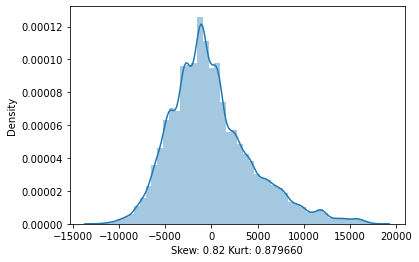

In [46]:
sns.distplot(model.resid)
plt.xlabel('Skew: %.2f Kurt: %2f'%(model.resid.skew(),model.resid.kurt()))

* The residual is not normally distributed

In [47]:
# Calculate VIF

In [48]:
vif = [VIF(X_train.values,i) for i in range(X_train.shape[1])]

In [49]:
pd.DataFrame({'VIF': vif[:]},index=X_train.columns).sort_values(by =['VIF'],ascending = False)

,VIF
const,23.506123
City_Category_C,2.064564
City_Category_B,1.571043
User_ID,1.446061
Product_Category_3,1.228857
Product_Category_1,1.205529
Product_ID,1.152771
Age,1.136235
Marital_Status,1.108457
Gender,1.024616


## Let us try some regularization methods

In [50]:
param = {'alpha': [0.01, 0.1, 1, 10],'l1_ratio': [0,0.3,0.5,1]}

In [51]:
gscv = GridSearchCV(estimator = ElasticNet(), 
                    param_grid= param, 
                    scoring = 'r2', 
                    verbose = 3, 
                    cv = 3)

In [52]:
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.750e+12, tolerance: 6.484e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV 1/3] END ............alpha=0.01, l1_ratio=0;, score=0.155 total time=   3.5s


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.744e+12, tolerance: 6.487e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV 2/3] END ............alpha=0.01, l1_ratio=0;, score=0.150 total time=   3.4s


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.741e+12, tolerance: 6.464e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV 3/3] END ............alpha=0.01, l1_ratio=0;, score=0.154 total time=   3.4s
[CV 1/3] END ..........alpha=0.01, l1_ratio=0.3;, score=0.155 total time=   0.0s
[CV 2/3] END ..........alpha=0.01, l1_ratio=0.3;, score=0.150 total time=   0.1s
[CV 3/3] END ..........alpha=0.01, l1_ratio=0.3;, score=0.154 total time=   0.0s
[CV 1/3] END ..........alpha=0.01, l1_ratio=0.5;, score=0.155 total time=   0.1s
[CV 2/3] END ..........alpha=0.01, l1_ratio=0.5;, score=0.150 total time=   0.0s
[CV 3/3] END ..........alpha=0.01, l1_ratio=0.5;, score=0.154 total time=   0.1s
[CV 1/3] END ............alpha=0.01, l1_ratio=1;, score=0.202 total time=   0.1s
[CV 2/3] END ............alpha=0.01, l1_ratio=1;, score=0.196 total time=   0.1s
[CV 3/3] END ............alpha=0.01, l1_ratio=1;, score=0.200 total time=   0.1s


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.756e+12, tolerance: 6.484e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV 1/3] END .............alpha=0.1, l1_ratio=0;, score=0.154 total time=   3.3s


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.750e+12, tolerance: 6.487e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV 2/3] END .............alpha=0.1, l1_ratio=0;, score=0.150 total time=   3.4s


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.747e+12, tolerance: 6.464e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV 3/3] END .............alpha=0.1, l1_ratio=0;, score=0.153 total time=   3.4s
[CV 1/3] END ...........alpha=0.1, l1_ratio=0.3;, score=0.154 total time=   0.0s
[CV 2/3] END ...........alpha=0.1, l1_ratio=0.3;, score=0.150 total time=   0.0s
[CV 3/3] END ...........alpha=0.1, l1_ratio=0.3;, score=0.153 total time=   0.0s
[CV 1/3] END ...........alpha=0.1, l1_ratio=0.5;, score=0.154 total time=   0.0s
[CV 2/3] END ...........alpha=0.1, l1_ratio=0.5;, score=0.150 total time=   0.1s
[CV 3/3] END ...........alpha=0.1, l1_ratio=0.5;, score=0.154 total time=   0.0s
[CV 1/3] END .............alpha=0.1, l1_ratio=1;, score=0.201 total time=   0.1s
[CV 2/3] END .............alpha=0.1, l1_ratio=1;, score=0.195 total time=   0.1s
[CV 3/3] END .............alpha=0.1, l1_ratio=1;, score=0.199 total time=   0.1s


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.778e+12, tolerance: 6.484e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV 1/3] END ...............alpha=1, l1_ratio=0;, score=0.151 total time=   3.5s


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.774e+12, tolerance: 6.487e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV 2/3] END ...............alpha=1, l1_ratio=0;, score=0.147 total time=   3.4s


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.770e+12, tolerance: 6.464e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV 3/3] END ...............alpha=1, l1_ratio=0;, score=0.151 total time=   3.4s
[CV 1/3] END .............alpha=1, l1_ratio=0.3;, score=0.151 total time=   0.0s
[CV 2/3] END .............alpha=1, l1_ratio=0.3;, score=0.148 total time=   0.0s
[CV 3/3] END .............alpha=1, l1_ratio=0.3;, score=0.151 total time=   0.0s
[CV 1/3] END .............alpha=1, l1_ratio=0.5;, score=0.152 total time=   0.0s
[CV 2/3] END .............alpha=1, l1_ratio=0.5;, score=0.148 total time=   0.0s
[CV 3/3] END .............alpha=1, l1_ratio=0.5;, score=0.152 total time=   0.0s
[CV 1/3] END ...............alpha=1, l1_ratio=1;, score=0.155 total time=   0.0s
[CV 2/3] END ...............alpha=1, l1_ratio=1;, score=0.150 total time=   0.1s
[CV 3/3] END ...............alpha=1, l1_ratio=1;, score=0.154 total time=   0.0s


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.886e+12, tolerance: 6.484e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV 1/3] END ..............alpha=10, l1_ratio=0;, score=0.137 total time=   3.4s


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.883e+12, tolerance: 6.487e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV 2/3] END ..............alpha=10, l1_ratio=0;, score=0.135 total time=   3.4s


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.878e+12, tolerance: 6.464e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV 3/3] END ..............alpha=10, l1_ratio=0;, score=0.138 total time=   3.3s
[CV 1/3] END ............alpha=10, l1_ratio=0.3;, score=0.142 total time=   0.1s
[CV 2/3] END ............alpha=10, l1_ratio=0.3;, score=0.139 total time=   0.0s
[CV 3/3] END ............alpha=10, l1_ratio=0.3;, score=0.142 total time=   0.0s
[CV 1/3] END ............alpha=10, l1_ratio=0.5;, score=0.145 total time=   0.0s
[CV 2/3] END ............alpha=10, l1_ratio=0.5;, score=0.142 total time=   0.0s
[CV 3/3] END ............alpha=10, l1_ratio=0.5;, score=0.145 total time=   0.0s
[CV 1/3] END ..............alpha=10, l1_ratio=1;, score=0.154 total time=   0.1s
[CV 2/3] END ..............alpha=10, l1_ratio=1;, score=0.150 total time=   0.0s
[CV 3/3] END ..............alpha=10, l1_ratio=1;, score=0.154 total time=   0.0s


GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'l1_ratio': [0, 0.3, 0.5, 1]},
             scoring='r2', verbose=3)

In [53]:
gscv.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [54]:
gscv.best_score_

0.19969071644212946

## Let us try Models with other algorithms 

In [55]:
X.drop('const',axis = 1, inplace = True)

In [56]:
X.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'City_Category_B',
       'City_Category_C'],
      dtype='object')

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = 0.3)

In [58]:
def model_results(model,x_train,y_train,x_test,y_test):
    print(str(model))
    n = x_train.shape[0]
    p = x_train.shape[1]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print('R2 :\t',r2)
    print('Adj R2:\t',adj_r2)
    print('MSE:\t',mean_squared_error(y_test,y_pred))
    print('RMSE:\t',(mean_squared_error(y_test,y_pred))**0.5,'\n')

In [59]:
# USING KNeighborsRegressor algorithm

In [60]:
std = StandardScaler()
#X_train_s = std.fit_transform(X_train)
#X_test_s = std.transform(X_test)
model_results(KNeighborsRegressor(n_neighbors=7),X_train, y_train, X_test,y_test)

KNeighborsRegressor(n_neighbors=7)
R2 :	 0.6207338097825383
Adj R2:	 0.6207219895425528
MSE:	 9564199.858025862
RMSE:	 3092.604057752279 



In [61]:
# tuning the parameters of KNeighborsRegressor using gridsearchCV
param = [{'n_neighbors': [5,7,9,12]}]

gscv1 = GridSearchCV(estimator = KNeighborsRegressor(), 
                    param_grid= param, 
                    scoring = 'r2', 
                    verbose = 3, 
                    cv = 3)

In [62]:
gscv1.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .....................n_neighbors=5;, score=0.602 total time=  25.5s
[CV 2/3] END .....................n_neighbors=5;, score=0.599 total time=  25.9s
[CV 3/3] END .....................n_neighbors=5;, score=0.600 total time=  25.6s
[CV 1/3] END .....................n_neighbors=7;, score=0.611 total time=  31.1s
[CV 2/3] END .....................n_neighbors=7;, score=0.606 total time=  28.1s
[CV 3/3] END .....................n_neighbors=7;, score=0.608 total time=  29.1s
[CV 1/3] END .....................n_neighbors=9;, score=0.612 total time=  29.9s
[CV 2/3] END .....................n_neighbors=9;, score=0.608 total time=  29.8s
[CV 3/3] END .....................n_neighbors=9;, score=0.610 total time=  30.4s
[CV 1/3] END ....................n_neighbors=12;, score=0.610 total time=  32.1s
[CV 2/3] END ....................n_neighbors=12;, score=0.607 total time=  32.4s
[CV 3/3] END ....................n_neighbors=12;,

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [5, 7, 9, 12]}], scoring='r2',
             verbose=3)

In [63]:
gscv1.best_params_

{'n_neighbors': 9}

In [64]:
gscv1.best_score_

0.6099750041293067

In [65]:
# using the best parameters to check the results

In [66]:
model_results(KNeighborsRegressor(**gscv1.best_params_),X_train,y_train,X_test,y_test)

KNeighborsRegressor(n_neighbors=9)
R2 :	 0.6231607354230473
Adj R2:	 0.6231489908208175
MSE:	 9502998.51062106
RMSE:	 3082.6933857620447 



In [67]:
# USING DecisionTreeRegressor algorithm

In [68]:
#model_results(DecisionTreeRegressor(max_depth= 7),X_train,y_train,X_test,y_test)

DecisionTreeRegressor(max_depth=7)
R2 :	 0.6827277891851591
Adj R2:	 0.6827179010544231
MSE:	 8000857.740287826
RMSE:	 2828.578749175604 



#tuning the parameters

param = [{'max_depth': [9,10,11,12]}]

gscv = GridSearchCV(estimator = DecisionTreeRegressor(), 
                    param_grid= param, 
                    scoring = 'r2', 
                    verbose = 3, 
                    cv = 3)

gscv.fit(X_train, y_train)

gscv.best_params_ , gscv.best_score_

In [72]:
# using the best parameters to check the results

model_results(DecisionTreeRegressor(**gscv.best_params_),X_train,y_train,X_test,y_test)

### Saving pickle file 

# saving model using pickle 

model_dt = DecisionTreeRegressor(max_depth = 10)
model_dt.fit(X_train,y_train)
model_dt.score(X_train,y_train)


In [ ]:
file = open('dt_model.pkl', 'wb')
pickle.dump(model_dt,file)

file = open('dt_model.pkl', 'rb')
DT_model = pickle.load(file)

In [99]:
DT_model.score(X_test,y_test)

0.6929807060430683

In [74]:
# USING RandomForestRegressor algorithm

RF_model = model_results(RandomForestRegressor(n_estimators=250),X_train,y_train,X_test,y_test)

### Saving pickle file

In [101]:
# saving Randomforrest model as pickle file
file = open('RF_model.pkl', 'wb')
pickle.dump(RF_model,file)

file = open('RF_model.pkl', 'rb')
RF_model = pickle.load(file)


In [78]:
# USING LGBMRegressor algorithm

In [80]:
model_results(LGBMRegressor(boosting_type= 'gbdt',n_estimators= 250 ),X_train,y_train,X_test,y_test)

LGBMRegressor(n_estimators=250)
R2 :	 0.7200571413946439
Adj R2:	 0.720048416673442
MSE:	 7059499.416474558
RMSE:	 2656.971850899922 



In [84]:
# tuning the paameter of LGBMRegressor

In [82]:
param = [{'n_estimators': [300,350,400,450,600]}]

gscv2 = GridSearchCV(estimator = LGBMRegressor(), 
                    param_grid= param, 
                    scoring = 'r2', 
                    verbose = 3, 
                    cv = 3)

In [83]:
gscv2.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ..................n_estimators=300;, score=0.723 total time=   1.9s
[CV 2/3] END ..................n_estimators=300;, score=0.722 total time=   2.1s
[CV 3/3] END ..................n_estimators=300;, score=0.723 total time=   2.1s
[CV 1/3] END ..................n_estimators=350;, score=0.725 total time=   2.4s
[CV 2/3] END ..................n_estimators=350;, score=0.724 total time=   2.4s
[CV 3/3] END ..................n_estimators=350;, score=0.725 total time=   2.2s
[CV 1/3] END ..................n_estimators=400;, score=0.727 total time=   2.5s
[CV 2/3] END ..................n_estimators=400;, score=0.726 total time=   2.4s
[CV 3/3] END ..................n_estimators=400;, score=0.727 total time=   2.4s
[CV 1/3] END ..................n_estimators=450;, score=0.729 total time=   2.6s
[CV 2/3] END ..................n_estimators=450;, score=0.727 total time=   2.6s
[CV 3/3] END ..................n_estimators=450;,

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid=[{'n_estimators': [300, 350, 400, 450, 600]}],
             scoring='r2', verbose=3)

In [85]:
model_results(LGBMRegressor(**gscv2.best_params_),X_train,y_train,X_test,y_test)

LGBMRegressor(n_estimators=600)
R2 :	 0.7325708393776884
Adj R2:	 0.7325625046593844
MSE:	 6743933.432582905
RMSE:	 2596.9084374661547 



In [103]:
# USING XGBOOST algorithm

In [105]:
param = [{'n_estimators': [300,350,400,450,600]}]

gscv3 = GridSearchCV(estimator = XGBRegressor(), 
                    param_grid= param, 
                    scoring = 'r2', 
                    verbose = 3, 
                    cv = 3)

gscv3.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ..................n_estimators=300;, score=0.741 total time=  18.1s
[CV 2/3] END ..................n_estimators=300;, score=0.739 total time=  16.6s
[CV 3/3] END ..................n_estimators=300;, score=0.740 total time=  17.9s
[CV 1/3] END ..................n_estimators=350;, score=0.742 total time=  20.0s
[CV 2/3] END ..................n_estimators=350;, score=0.740 total time=  20.3s
[CV 3/3] END ..................n_estimators=350;, score=0.741 total time=  20.5s
[CV 1/3] END ..................n_estimators=400;, score=0.742 total time=  23.0s
[CV 2/3] END ..................n_estimators=400;, score=0.740 total time=  23.3s
[CV 3/3] END ..................n_estimators=400;, score=0.741 total time=  22.5s
[CV 1/3] END ..................n_estimators=450;, score=0.743 total time=  27.5s
[CV 2/3] END ..................n_estimators=450;, score=0.741 total time=  29.5s
[CV 3/3] END ..................n_estimators=450;,

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid=[{'n_estimators': [300, 350, 400, 450, 600]}],
             scoring='r2', verbose=3)

In [106]:
gscv3.best_params_

{'n_estimators': 600}

In [136]:
XGB_model= model_results(XGBRegressor(**gscv3.best_params_),X_train,y_train,X_test,y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
R2 :	 0.7470211627386865
Adj R2:	 0.7470132783802996
MSE:	 6379530.318879462
RMSE:	 2525.7732120836704 



### Saving pickle file

In [137]:
# saving Randomforrest model as pickle file
file = open('XGB_model.pkl', 'wb')
pickle.dump(XGB_model,file)

file = open('XGB_model.pkl', 'rb')
XGB_model = pickle.load(file)

In [108]:
# using catboost algorithm

model_results(CatBoostRegressor(iterations=100),X_train,y_train,X_test,y_test)

Learning rate set to 0.5
0:	learn: 3923.2051531	total: 249ms	remaining: 24.6s
1:	learn: 3511.2071569	total: 305ms	remaining: 14.9s
2:	learn: 3140.6695250	total: 346ms	remaining: 11.2s
3:	learn: 3052.3117875	total: 389ms	remaining: 9.33s
4:	learn: 2992.5650475	total: 429ms	remaining: 8.14s
5:	learn: 2923.7466563	total: 467ms	remaining: 7.32s
6:	learn: 2903.4043886	total: 504ms	remaining: 6.69s
7:	learn: 2883.5065387	total: 538ms	remaining: 6.19s
8:	learn: 2872.9177873	total: 574ms	remaining: 5.81s
9:	learn: 2861.6772639	total: 611ms	remaining: 5.5s
10:	learn: 2856.9848693	total: 645ms	remaining: 5.21s
11:	learn: 2845.2812575	total: 683ms	remaining: 5.01s
12:	learn: 2833.2432096	total: 716ms	remaining: 4.79s
13:	learn: 2829.9602068	total: 751ms	remaining: 4.62s
14:	learn: 2823.9224745	total: 787ms	remaining: 4.46s
15:	learn: 2820.7961638	total: 821ms	remaining: 4.31s
16:	learn: 2816.3440985	total: 861ms	remaining: 4.2s
17:	learn: 2810.1977730	total: 898ms	remaining: 4.09s
18:	learn: 2807

In [ ]:
# USING GradientBoostingRegressor algorithm

In [109]:
model_results(GradientBoostingRegressor(n_estimators= 150, max_depth= 9),X_train,y_train,X_test,y_test) 

GradientBoostingRegressor(max_depth=9, n_estimators=150)
R2 :	 0.7376920800041298
Adj R2:	 0.737683904894815
MSE:	 6614787.808386237
RMSE:	 2571.922978704113 



In [ ]:
# USING BaggingRegressor algorithm

bag_reg = BaggingRegressor(base_estimator=XGBRegressor(n_neighbors=600), n_estimators= 100)
bag_reg.fit(X_train, y_train)

In [110]:
#model_results(BaggingRegressor(base_estimator=XGBRegressor(n_neighbors=600), n_estimators= 100),X_train,y_train,X_test,y_test) 

BaggingRegressor(base_estimator=XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None, gamma=None,
                                             gpu_id=None, grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
       

[20:59:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:59:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This c

[21:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This c

[21:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:07:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This c

[21:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This c

[21:14:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:14:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:14:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This c

In [112]:
# USING STACKING REGRESSOR MODEL

In [167]:
estimators = ['KNN', KNeighborsRegressor(n_neighbors=9),
             'DT', DecisionTreeRegressor(max_depth=10),
             'RF', RandomForestRegressor(n_estimators=250)]

In [168]:
type(estimators)

list

In [169]:
ST_model = StackingRegressor(
    estimators = estimators, 
    cv= 5)           

In [171]:
ST_model.fit(X_train,y_train)

TypeError: 'KNeighborsRegressor' object is not iterable

In [172]:
test_f.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_B,City_Category_C
0,0.000019,0.001701,1,4,7,2,1,1,11.0,0.0,1,0
1,0.000108,0.000473,1,2,17,0,0,3,5.0,0.0,0,1
2,0.000413,0.000277,0,3,1,4,1,5,14.0,0.0,1,0
3,0.000413,0.000029,0,3,1,4,1,4,9.0,0.0,1,0
4,0.000140,0.000997,0,2,1,1,0,4,5.0,12.0,0,1


In [179]:
XGB_model = XGBRegressor(n_estimators=600)

In [180]:
XGB_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=600, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [181]:
XGB_model.score(X_test,y_test)

0.7470211627386865

In [182]:
y_pred_test_f = XGB_model.predict(test_f) 

In [183]:
y_test_f = pd.DataFrame(y_pred_test_f)

In [185]:
y_test_f.to_csv('Answer.csv')